In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:/Users/Guhan/Downloads/car_prices.csv")
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2010,Toyota,Venza,Base,Wagon,automatic,4t3za3bb5au037255,ca,8,72930,blue,tan,toyota financial services,13550,4500
1,2013,Toyota,Corolla,LE,Sedan,automatic,5yfbu4ee7dp143368,ca,15,48744,White,gray,fox rent a car tra,10600,9500
2,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4ac5dh682009,ca,12,48510,white,tan,hertz/tra,11350,6500
3,2012,Kia,Optima,SX,Sedan,automatic,5xxgr4a61cg029248,ca,6,47220,blue,black,kia motors finance,16750,12900
4,2013,Hyundai,Elantra,GLS,Sedan,automatic,5npdh4ae0dh320214,ca,20,42798,gray,gray,fox rent a car tra,11100,7600


In [10]:
df.info() #we can see there no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          1339 non-null   int64 
 1   make          1339 non-null   object
 2   model         1339 non-null   object
 3   trim          1339 non-null   object
 4   body          1339 non-null   object
 5   transmission  1339 non-null   object
 6   vin           1339 non-null   object
 7   state         1339 non-null   object
 8   condition     1339 non-null   int64 
 9   odometer      1339 non-null   int64 
 10  color         1339 non-null   object
 11  interior      1339 non-null   object
 12  seller        1339 non-null   object
 13  mmr           1339 non-null   int64 
 14  sellingprice  1339 non-null   int64 
dtypes: int64(5), object(10)
memory usage: 157.0+ KB


In [11]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
mean,2012.001494,31.721434,37882.530993,16620.294996,16454.706497
std,1.117866,13.621323,17270.188899,6655.213580,6790.165113
min,2009.000000,2.000000,1331.000000,3575.000000,3300.000000
25%,2011.000000,26.000000,26145.500000,11400.000000,11250.000000
50%,2012.000000,36.000000,36667.000000,15050.000000,14750.000000
75%,2013.000000,42.000000,48136.500000,20700.000000,21000.000000
max,2015.000000,49.000000,81105.000000,34400.000000,35250.000000


In [12]:
df.shape

(1339, 15)

In [13]:
#calculating correlation
df1 = df[["condition","odometer","mmr","sellingprice"]]
corr = df1.corr(method = "pearson")
corr

,condition,odometer,mmr,sellingprice
condition,1.000000,-0.033688,0.175659,0.279795
odometer,-0.033688,1.000000,-0.246536,-0.207351
mmr,0.175659,-0.246536,1.000000,0.953946
sellingprice,0.279795,-0.207351,0.953946,1.000000


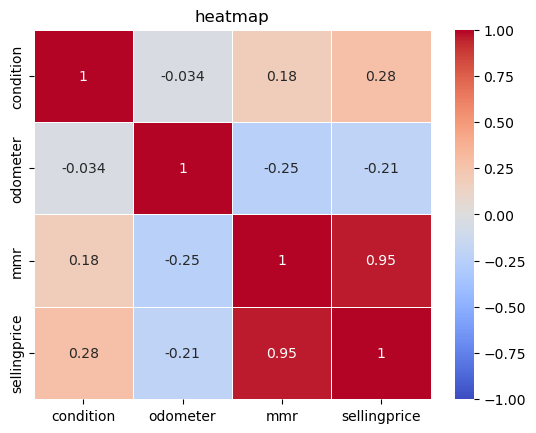

In [14]:
sns.heatmap(corr,cmap = "coolwarm",annot = True,center = 0,vmin= -1,vmax = 1,linewidth = 0.5)
plt.title("heatmap")
plt.show()

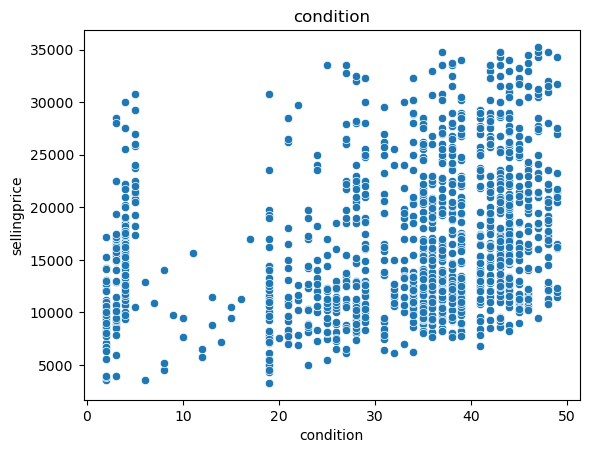

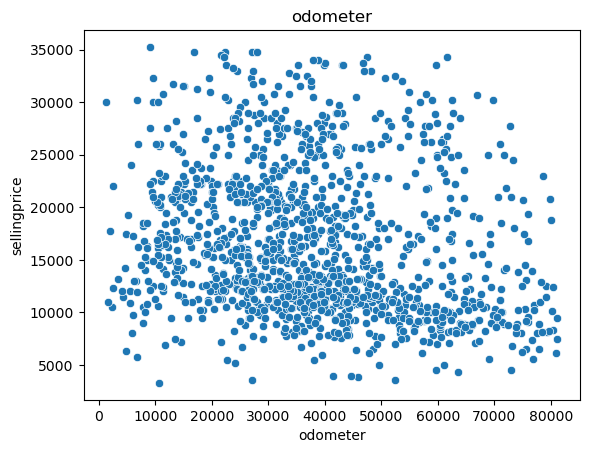

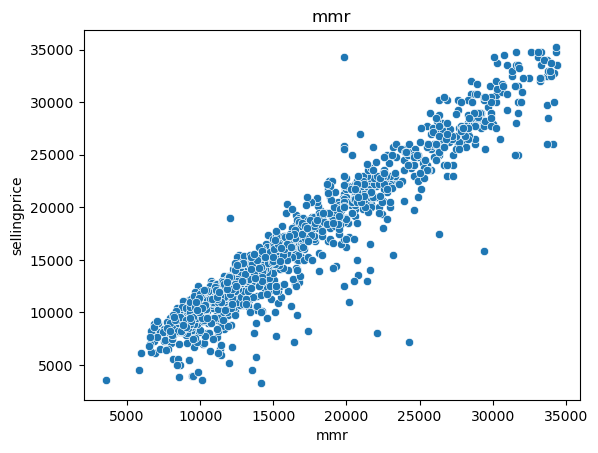

In [15]:
#visualize correlation
for i in ["condition","odometer","mmr"]:
    sns.scatterplot(y = df1["sellingprice"], x =df1[i])
    plt.title(i)
    plt.show()

In [16]:
pivot_df = df.pivot_table(
    index="year",
    columns="transmission",
    values="sellingprice",
    aggfunc="sum" ).reset_index()# Sum values 
pivot_df.columns=("Year","automatic","manual")
pivot_df


,Year,automatic,manual
0,2009,335300.0,NaN
1,2010,957100.0,24500.0
2,2011,6066850.0,46250.0
3,2012,8483602.0,130000.0
4,2013,4061500.0,100150.0
5,2014,1264750.0,18500.0
6,2015,533350.0,11000.0


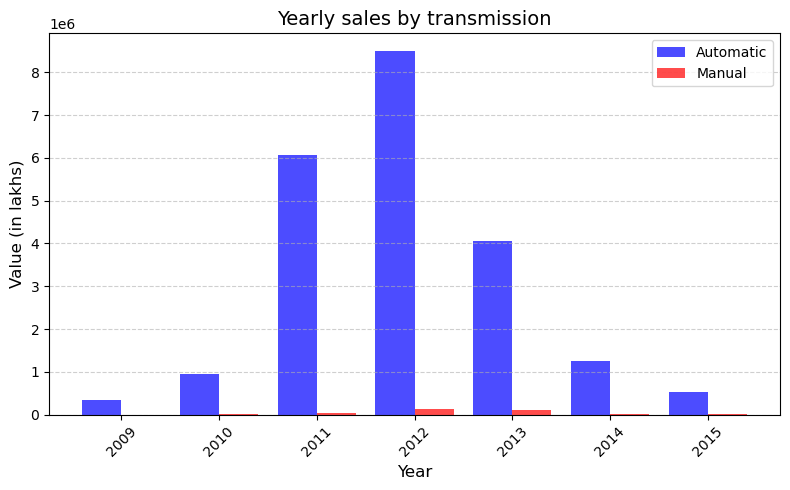

In [17]:
# Plotting
plt.figure(figsize=(8,5))
bar_width = 0.4
x = range(len(pivot_df["Year"]))

plt.bar(x, pivot_df["automatic"], width=bar_width, label="Automatic", color="blue", alpha=0.7)
plt.bar([i + bar_width for i in x], pivot_df["manual"], width=bar_width, label="Manual", color="red", alpha=0.7)

# Labels and Title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Value (in lakhs)", fontsize=12)
plt.title("Yearly sales by transmission", fontsize=14)
plt.xticks([i + bar_width / 2 for i in x], pivot_df["Year"], rotation=45)
plt.legend()

# Grid and Layout
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()


In [18]:
#total seeling price of each make respective to year
pivot_df = df.pivot_table(
    index="year",
    columns="make",
    values="sellingprice",
    aggfunc="sum" ).reset_index()# Sum values 
pivot_df.columns= ("year","Audi","BMW","Chevrolet","Dodge","Ford","Honda","Hyundai","Jaguar","Jeep","Kia","Mercedes-Benz","Nissan","Toyota")
pivot_df


,year,Audi,BMW,Chevrolet,Dodge,Ford,Honda,Hyundai,Jaguar,Jeep,Kia,Mercedes-Benz,Nissan,Toyota
0,2009,16000.0,98050.0,41000.0,NaN,NaN,11000.0,NaN,18600.0,NaN,NaN,120000.0,15200.0,15450.0
1,2010,37500.0,120750.0,156100.0,40800.0,121800.0,156450.0,19800.0,NaN,45600.0,22650.0,157250.0,31200.0,71700.0
2,2011,30100.0,2977800.0,272200.0,49750.0,369750.0,167800.0,238700.0,448000.0,63650.0,121650.0,406400.0,680000.0,287300.0
3,2012,64000.0,2010000.0,482900.0,147200.0,1182000.0,1177200.0,712950.0,153750.0,132800.0,241350.0,850252.0,1231800.0,227400.0
4,2013,NaN,NaN,NaN,NaN,NaN,NaN,1391400.0,52000.0,139400.0,539050.0,319000.0,1140150.0,580650.0
5,2014,32250.0,87500.0,467000.0,696500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,NaN,NaN,17000.0,NaN,24000.0,NaN,49100.0,NaN,NaN,397250.0,NaN,57000.0,NaN


In [19]:
# Read the CSV file
car_price = pd.read_csv("C:\\Users\\Guhan\\Downloads\\cleaned data 2.csv")

# Create dummy variables for specified columns
car_price1 = pd.get_dummies(car_price, 
                            columns=["color", "interior", "make", "transmission", "body"], 
                            drop_first=True)

# Display the first few rows of the modified datafram
car_price1 = car_price1.astype(int)
car_price1

,year,condition,odometer,mmr,sellingprice,color_beige,color_black,color_blue,color_brown,color_burgundy,...,body_Hatchback,body_Koup,body_Minivan,body_Regular Cab,body_SUV,body_Sedan,body_SuperCab,body_SuperCrew,body_Wagon,body_sedan
0,2010,8,72930,13550,4500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2013,15,48744,10600,9500,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2013,12,48510,11350,6500,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2012,6,47220,16750,12900,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2013,20,42798,11100,7600,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,2015,49,9552,20800,21000,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1335,2013,49,8495,15500,16100,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1336,2014,49,6874,16200,16200,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1337,2013,49,6747,11300,11900,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
